In [1]:
%matplotlib inline
import os

import scipy
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

### Распределение дозы по глубине

In [164]:
paths = glob.glob(f"build/*results*.csv")

In [192]:
data_raw = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=12, names=['name', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'E'])
    data_raw = pd.concat((data_raw, item), ignore_index=True)

In [193]:
data = data_raw
data_raw

,name,x,y,z,vx,vy,vz,E
0,gamma,8.62687,18.7803,42.0,0.41231,0.63044,1.54586,1.71963
1,gamma,-2.03114,-17.4397,42.0,-0.073924,-0.555033,1.37733,1.33898
2,e-,-2.291,-19.3907,46.8415,0.350289,-0.13986,0.175045,0.139984
3,gamma,-8.38571,-17.9946,42.0,-0.37091,-0.762739,1.81036,1.99918
4,gamma,-18.9994,-3.01534,42.0,-0.779771,-0.09588,1.97419,2.12478
...,...,...,...,...,...,...,...,...
33705,gamma,8.7599,19.7676,42.0,0.229794,0.276895,0.651779,0.744508
33706,gamma,12.2698,-16.2425,42.0,0.621733,-0.914522,2.28327,2.53697
33707,gamma,19.8023,18.7404,42.0,0.587275,0.762211,1.65769,1.91672
33708,gamma,17.0878,-10.129,42.0,0.682991,-0.327058,1.60618,0.77677


In [194]:
l = len(data_raw)
res = []
for name in set(data_raw['name']):
    count = len(data_raw[data_raw['name'] == name])
    res.append((name, count, count/l*100))
    
pd.DataFrame(res, columns=['name', 'count', 'percent'])

,name,count,percent
0,O16,333,0.987837
1,e+,146,0.433106
2,nu_e,438,1.299318
3,anti_nu_e,490,1.453575
4,neutron,1221,3.622071
5,proton,841,2.494809
6,gamma,20821,61.765055
7,e-,9420,27.944230


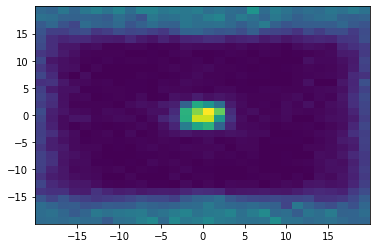

In [195]:
plt.hist2d(data['x'], data['y'], bins=30)
plt.show()

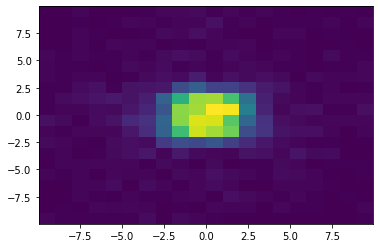

In [196]:
center = data[(-10 < data['x']) & (data['x'] < 10) & (-10 < data['y']) & (data['y'] < 10)]
plt.hist2d(center['x'], center['y'], bins=20)
plt.show()

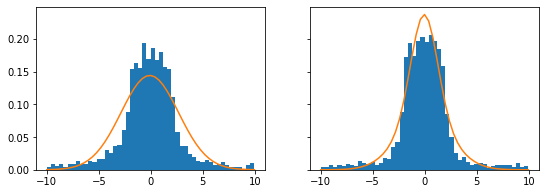

In [242]:
cnt_x = np.array(center['x'], dtype=float)
cnt_y = np.array(center['y'], dtype=float)

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

_, bins, _ = axs[0].hist(cnt_x, 50, density=True)
mu, sigma = scipy.stats.norm.fit(cnt_x)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
axs[0].plot(bins, best_fit_line)

_, bins, _ = axs[1].hist(cnt_y, 50, density=True)
mu, sigma = scipy.stats.norm.fit(cnt_y)
best_fit_line1 = scipy.stats.norm.pdf(bins, mu, sigma*0.5)
best_fit_line2 = scipy.stats.norm.pdf(bins, mu, sigma)
axs[1].plot(bins, (best_fit_line1+best_fit_line2)/2)
plt.show()

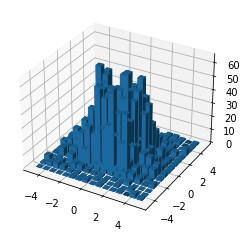

In [170]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = center['x'], center['y']
hist, xedges, yedges = np.histogram2d(x, y, bins=16, range=[[-5, 5], [-5, 5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

### Other

In [4]:
data = data.sort_values(by=['name'], ascending=False)

In [5]:

data['z'] -= data['z'].min()
z_bins = 300
dz = (data['z'].max() - data['z'].min()) / z_bins

In [6]:
data_dict = []
for i in np.arange(data['z'].min(), data['z'].max(), dz):
    data_dict.append({'z': i + dz / 2, 'edep': data[(data['z'] > i) & (data['z'] < (i + dz))]['edep'].sum()})

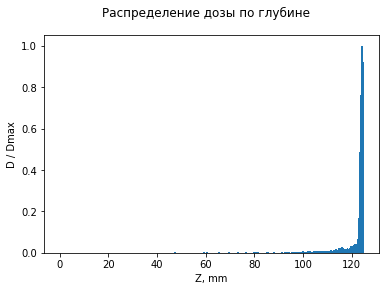

In [7]:
hist = pd.DataFrame(data_dict)
hist['edep'] /= hist['edep'].max()

d2plot = hist['edep'].values[::-1]
plt.bar(np.arange(len(d2plot)) * dz + dz / 2, d2plot)

hist['z'] = hist['z'].values[::-1]
#hist.sort_values(by=['z']).to_csv('aDoseDepthHist.csv', index=False)
plt.ylabel('D / Dmax')
plt.xlabel('Z, mm')
plt.suptitle('Распределение дозы по глубине')
#plt.savefig('aDoseDepthHist.png')

### Распределение по энергии и типу частиц

In [8]:
paths = glob.glob(f"build/*DoseData_t*.csv")

In [9]:
data = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=8, names=['particle_name', 'energy'])
    data = data.append(item, ignore_index=True)

In [10]:
particle_names = [name for name in set(data["particle_name"].values) if not name.startswith("W")]
datas = {}
for name in particle_names:
    if name.startswith("W") is False:
        datas[name] = data[data["particle_name"]==name]

In [11]:
particle_names

['gamma', 'e+', 'e-']

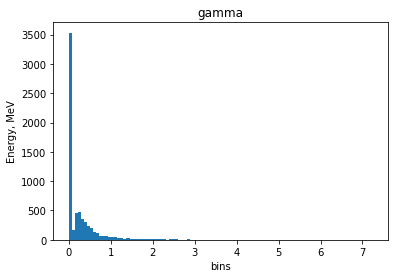

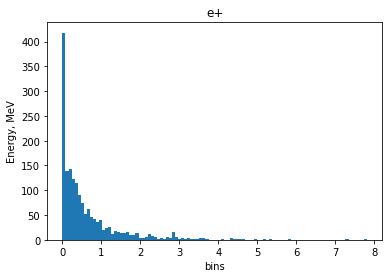

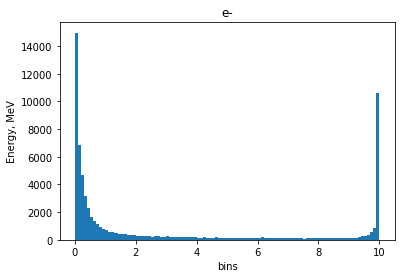

In [12]:
for name in particle_names:
    d = datas[name]["energy"].to_numpy()
    plt.hist(d, bins=100)
    plt.title(name)
    plt.ylabel('Energy, MeV')
    plt.xlabel('bins')
    plt.show()